In [1]:
%pylab inline
import matplotlib.pylab as plt

from wordshifts import WordShifts

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load demo data
sampleText = ''
with open('wordshifts/data/moby-dick.txt','r') as fl:
    for line in fl:
        sampleText += line.strip()
print len(sampleText)

1183891


In [3]:
wShift = WordShifts()
wsData = wShift.computeWordShifts(sampleText[:10000], sampleText[-5000:])

print wsData['arousal']

vals = list()
for w,d in wsData['arousal']['word_shift'].items():
    vals.append(d['shift'])
print sorted(vals)
print sum(vals)

{'comparison': 5.907102040816327, 'difference': 0.334428773489595, 'reference': 5.572673267326732, 'word_shift': {'all': {'case': '+d', 'shift': -2.808192640266889, 'value_difference': 0.6473267326732675, 'frequency_difference': -0.014507981410385937}, 'shot': {'case': '-d', 'shift': 18.193714183053633, 'value_difference': -3.0726732673267323, 'frequency_difference': -0.019801980198019802}, 'money': {'case': '+u', 'shift': 4.216331699583332, 'value_difference': 1.7273267326732675, 'frequency_difference': 0.00816326530612245}, 'magnetic': {'case': '+u', 'shift': 0.8388677822568925, 'value_difference': 0.6873267326732675, 'frequency_difference': 0.004081632653061225}, 'soon': {'case': '+d', 'shift': -1.335216610898637, 'value_difference': 0.7673267326732676, 'frequency_difference': -0.005819357445948676}, 'valuable': {'case': '+u', 'shift': 1.8884796457952633, 'value_difference': 1.5473267326732678, 'frequency_difference': 0.004081632653061225}, 'not': {'case': '-u', 'shift': -11.6517677

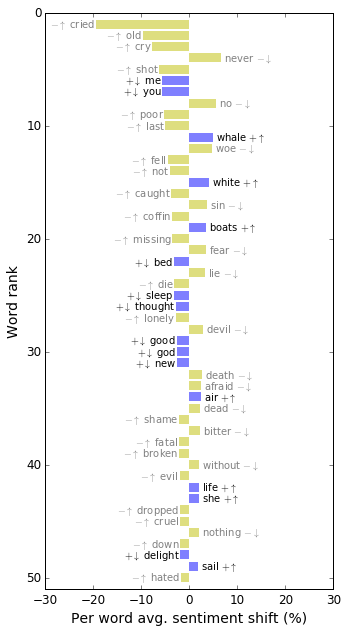

In [57]:
def plot_wordshift(wordShift, params={}):
    
    topN = params.get('topN', 50)
    shifts = list()
    sortedWords = list()
    for w in sorted(wordShift['word_shift'].items(), 
                    key=lambda x: abs(x[1]['shift']), 
                    reverse=True):
        sortedWords.append(w[0])
        shifts.append(wordShift['word_shift'][w[0]]['shift'])
    dVals = shifts[:topN]
    sortedWords = sortedWords[:topN]
    
    fig = plt.figure(figsize=params.get('figsize',(4,8)))
    #axSummary = fig.add_axes(params.get('rect_summary',[0.,0.9,1.,0.1]))
    #axSummary.set_xticks([])
    #axSummary.set_yticks([])
    #axSummary.set_xlim([-100,100])
    
    #axShifts = fig.add_axes(params.get('rect_shifts',[0.,0.,1.,0.9]))
    axShifts = fig.add_axes(params.get('rect_shifts',[0.,0.,1.,1.]))
    barlist = axShifts.barh(range(1,topN+1), dVals,
                  align='center', linewidth=0, alpha=0.5, color='r')
    axShifts.set_ylim(axShifts.get_ylim()[::-1])
    for i,w in enumerate(sortedWords):
        case = wordShift['word_shift'][w]['case'].replace('u','\\uparrow').replace('d','\\downarrow')
        shift = wordShift['word_shift'][w]['shift']
        
        barlist[i].set_color('b' if case[0] == '+' else 'y')
        if shift > 0:
            axShifts.text(shift, i+1, r' {} ${}$'.format(w, case), 
                          color='0.0' if '+' in case else '0.5',
                          va='center', ha='left')
        else:
            axShifts.text(shift, i+1, r'${}$ {} '.format(case, w), 
                          color='0.0' if '+' in case else '0.5',
                          va='center', ha='right')
    
    #axShifts.set_xticks([])
    #axShifts.set_yticks([])
    #axShifts.set_xlim([-100,100])
    xmax = 1.5 * max([abs(x) for x in axShifts.get_xlim()])
    axShifts.set_xlabel('Per word avg. sentiment shift (%)', fontsize=14)
    axShifts.set_ylabel('Word rank', fontsize=14)
    axShifts.set_xlim([-xmax,xmax])
    axShifts.set_ylim([topN+1, 0])
    axShifts.tick_params(axis='both', which='major', labelsize=12)
    
    if params.get('rect_cumulative',True) <> False:
        axCumulative = fig.add_axes(params.get('rect_cumulative',[.1, 0.1, .17, .2]))
        csum = np.cumsum(shifts)
        axCumulative.plot(csum, range(len(csum)), c='k')
        axCumulative.axhline(topN)
        axCumulative.set_yscale('log')
        if sum(shifts) > 0:
            axCumulative.set_xticks([0,100])
            axCumulative.set_xticklabels([0,100])
            axCumulative.set_xlim((0,sum(shifts)))
        else:
            axCumulative.set_xticks([-100,0])
            axCumulative.set_xticklabels([-100,0])
            axCumulative.set_xlim((sum(shifts),0))
        axCumulative.invert_yaxis()
        axCumulative.set_xlabel(r'$\sum_{i=1}^r \delta h_{avg,i}$',fontsize=12)
        axCumulative.tick_params(axis='both', which='major', labelsize=8)
        
    #if params.get('rect_size', True) <> False:
    #    axSize = fig.add_axes(params.get('rect_size',[.7, .05, .25, .125]))
    #    axSize.set_xticks([])
    #    axSize.set_yticks([])
        
    if 'title' in params:
        axShifts.set_title(params['title'], fontsize=14)
        
    if 'savefig' in params:
        plt.savefig(params['savefig'], bbox_inches='tight', dpi=300)
        
    
#wShift = WordShifts()
#wsData = wShift.computeWordShifts(sampleText[-int(len(sampleText)*0.1):],
#                                  sampleText[:int(len(sampleText)*0.1)])
    
plot_wordshift(wsData['happiness'], params={'topN':50, 'rect_cumulative':False})